Actividad 1

In [19]:
import math
import numpy as np
import matplotlib.pyplot as plt

def euler_method(f, y0, tiempo):
    y_values = [y0]
    y = y0
    h = tiempo[1] - tiempo[0]

    for t in tiempo[1:]:
        y += h * f(y)
        y_values.append(y)

    return y_values

def runge_kutta2_method(f, y0, tiempo):
    y_values = [y0]
    y = y0
    h = tiempo[1] - tiempo[0]

    for t in tiempo[1:]:
        k1 = h * f(y)
        k2 = h * f(y + k1)
        y += (k1 + k2) / 2
        y_values.append(y)

    return y_values

def runge_kutta4_method(f, y0, tiempo):
    y_values = [y0]
    y = y0
    h = tiempo[1] - tiempo[0]

    for t in tiempo[1:]:
        k1 = h * f(y)
        k2 = h * f(y + 0.5 * k1)
        k3 = h * f(y + 0.5 * k2)
        k4 = h * f(y + k3)
        y += (k1 + 2*k2 + 2*k3 + k4) / 6
        y_values.append(y)

    return y_values

def ode_exponencial (poblacion_inicial, r):
    return (r * poblacion_inicial)

def ode_logistica (poblacion_inicial, r, k):
    return r * poblacion_inicial * ((k - poblacion_inicial) / k)

def sol_exponencial (poblacion_inicial, r,t):
    poblacion = []
    for i in t:
        poblacion.append(poblacion_inicial * math.exp(r * i))
    return poblacion

def sol_logistica(poblacion_inicial, k, r, t):
    poblacion = []
    for i in t:
        poblacion.append(poblacion_inicial * k * math.exp(r * i) / (k - poblacion_inicial + poblacion_inicial * math.exp(r * i)))
    return poblacion

def calcular_error_absoluto(metodo_numerico, f_solucion_exacta, ode, p_inicial, tiempo):
    metodo_values = metodo_numerico(ode, p_inicial, tiempo)
    exact_solution = f_solucion_exacta(p_inicial, tiempo)
    
    errores = [abs(metodo_values[i] - exact_solution[i]) for i in range(len(tiempo))]
    
    return errores


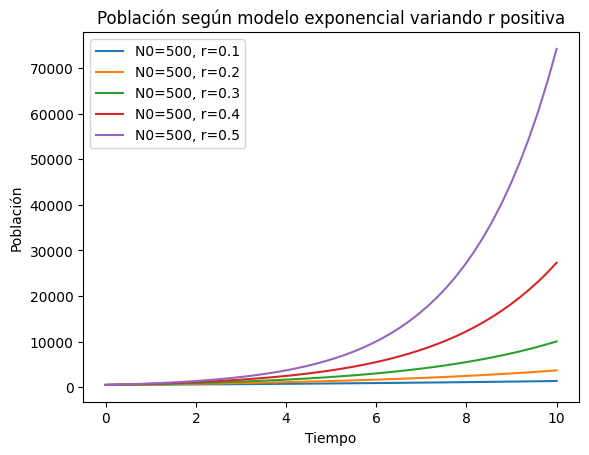

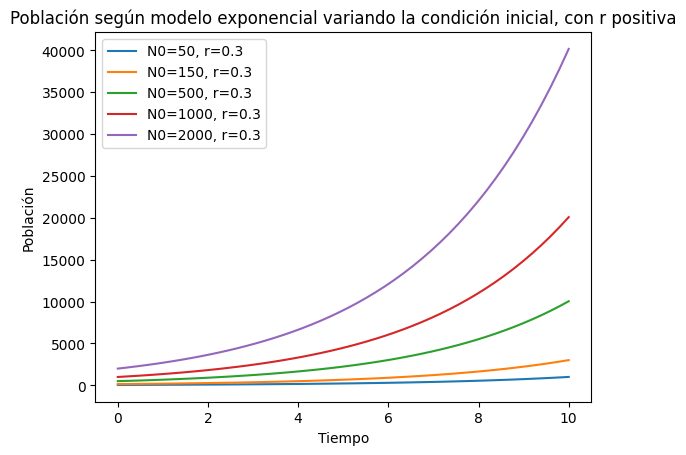

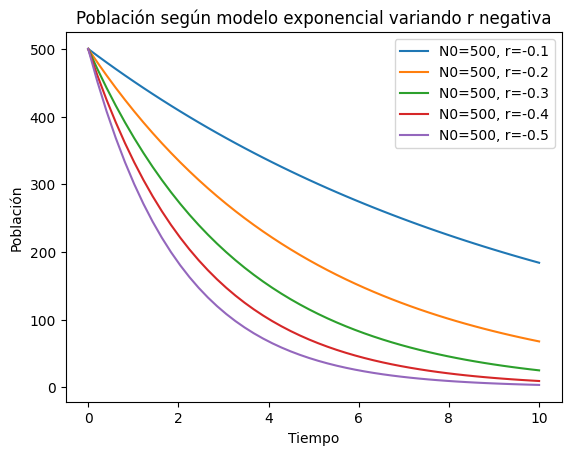

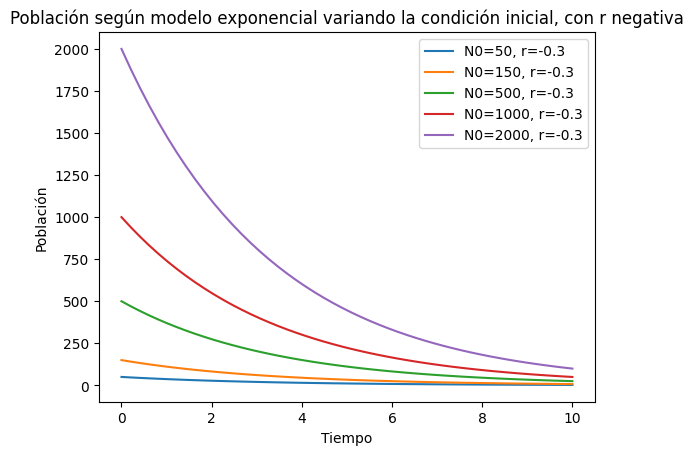

In [20]:
#EXPLORANDO SOLUCION DEL MODELO EXPONENCIAL
tiempo = np.linspace(0, 10, 50)
rs = [0.1, 0.2, 0.3, 0.4, 0.5]
ks = [1000, 3000, 5000, 7000, 10000]
n0s = [50, 150, 500, 1000, 2000]

r_medio = rs[len(rs) // 2]
pob_inicial_medio = n0s[len(n0s) // 2]

for r in rs:
    expo = sol_exponencial(pob_inicial_medio, r, tiempo)
    etiqueta = f'N0={pob_inicial_medio}, r={r}'
    plt.plot(tiempo, expo, label=etiqueta)
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.title('Población según modelo exponencial variando r positiva')
plt.legend()
plt.show()

for n0 in n0s:
    expo = sol_exponencial(n0, r_medio, tiempo)
    etiqueta = f'N0={n0}, r={r_medio}'
    plt.plot(tiempo, expo, label=etiqueta)
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.title('Población según modelo exponencial variando la condición inicial, con r positiva')
plt.legend()
plt.show()

for r in rs:
    expo = sol_exponencial(pob_inicial_medio, -r, tiempo)
    etiqueta = f'N0={pob_inicial_medio}, r={-r}'
    plt.plot(tiempo, expo, label=etiqueta)
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.title('Población según modelo exponencial variando r negativa')
plt.legend()
plt.show()

for n0 in n0s:
    expo = sol_exponencial(n0, -r_medio, tiempo)
    etiqueta = f'N0={n0}, r={-r_medio}'
    plt.plot(tiempo, expo, label=etiqueta)
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.title('Población según modelo exponencial variando la condición inicial, con r negativa')
plt.legend()
plt.show()

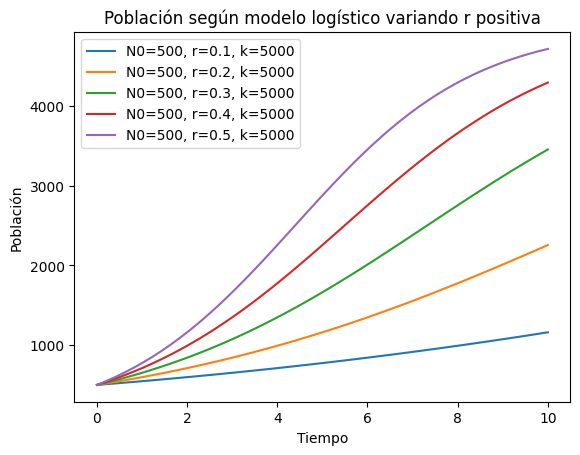

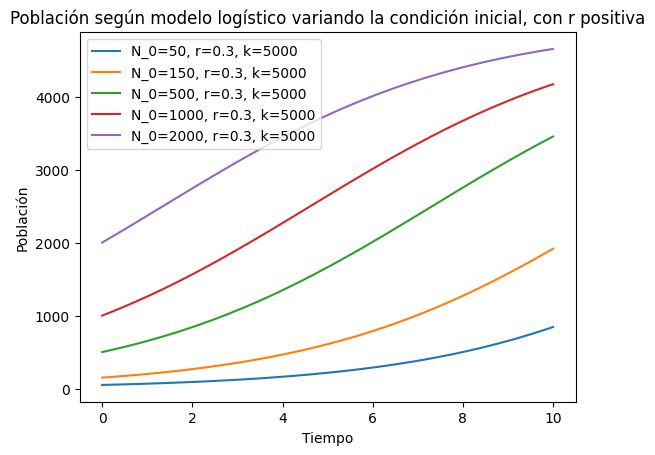

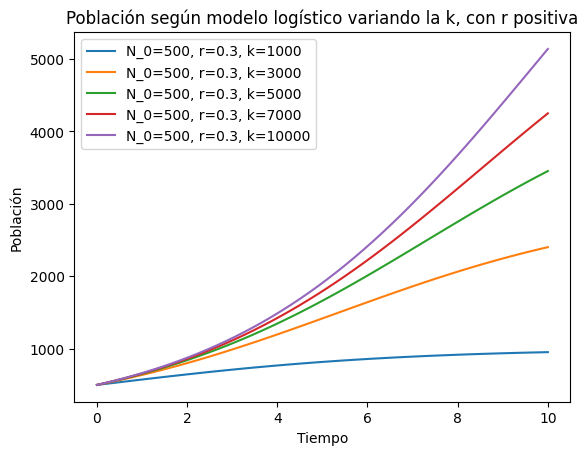

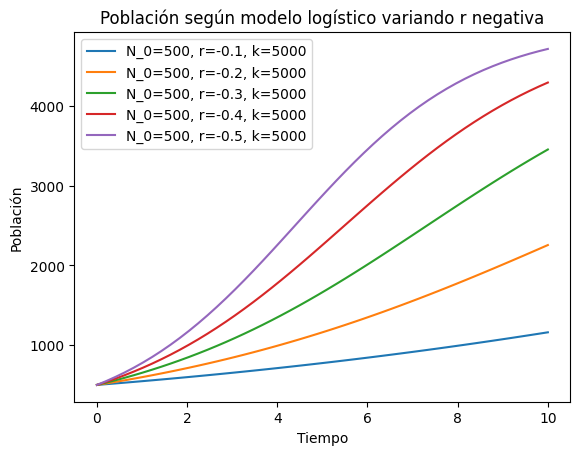

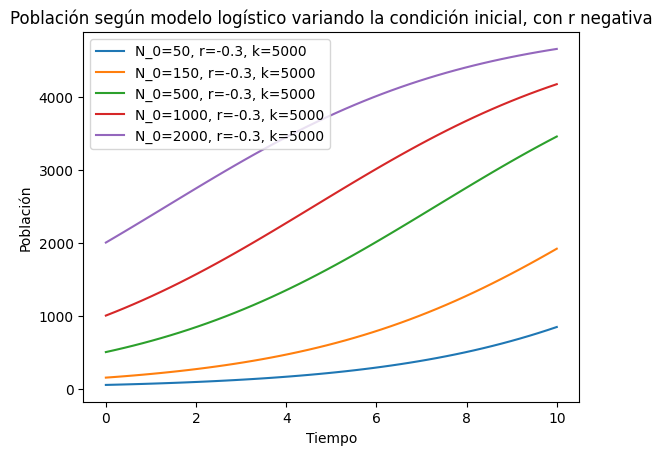

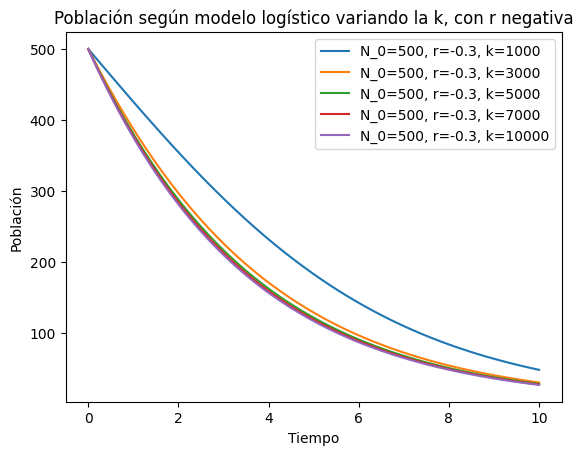

In [21]:
#EXPLORANDO SOLUCION DEL MODELO LOGISTICO
tiempo = np.linspace(0, 10, 50)
rs = [0.1, 0.2, 0.3, 0.4, 0.5]
ks = [1000, 3000, 5000, 7000, 10000]
pob_inicial = [50, 150, 500, 1000, 2000]

r_medio = rs[len(rs) // 2]
pob_inicial_medio = pob_inicial[len(pob_inicial) // 2]
k_medio = ks[len(ks) // 2]

for r in rs:
    log = sol_logistica(pob_inicial_medio, k_medio, r, tiempo)
    etiqueta = f'N0={pob_inicial_medio}, r={r}, k={k_medio}'
    plt.plot(tiempo, log, label=etiqueta)
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.title('Población según modelo logístico variando r positiva')
plt.legend()
plt.show()

for n0 in pob_inicial:
    log = sol_logistica(n0, k_medio, r_medio, tiempo)
    etiqueta = f'N_0={n0}, r={r_medio}, k={k_medio}'
    plt.plot(tiempo, log, label=etiqueta)
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.title('Población según modelo logístico variando la condición inicial, con r positiva')
plt.legend()
plt.show()

for k in ks:
    log = sol_logistica(pob_inicial_medio, k, r_medio, tiempo)
    etiqueta = f'N_0={pob_inicial_medio}, r={r_medio}, k={k}'
    plt.plot(tiempo, log, label=etiqueta)
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.title('Población según modelo logístico variando la k, con r positiva')
plt.legend()
plt.show()

for r in rs:
    log = sol_logistica(pob_inicial_medio, k_medio, r, tiempo)
    etiqueta = f'N_0={pob_inicial_medio}, r={-r}, k={k_medio}'
    plt.plot(tiempo, log, label=etiqueta)
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.title('Población según modelo logístico variando r negativa')
plt.legend()
plt.show()

for n0 in pob_inicial:
    log = sol_logistica(n0, k_medio, r_medio, tiempo)
    etiqueta = f'N_0={n0}, r={-r_medio}, k={k_medio}'
    plt.plot(tiempo, log, label=etiqueta)
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.title('Población según modelo logístico variando la condición inicial, con r negativa')
plt.legend()
plt.show()

for k in ks:
    log = sol_logistica(pob_inicial_medio, k, -r_medio, tiempo)
    etiqueta = f'N_0={pob_inicial_medio}, r={-r_medio}, k={k}'
    plt.plot(tiempo, log, label=etiqueta)
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.title('Población según modelo logístico variando la k, con r negativa')
plt.legend()
plt.show()

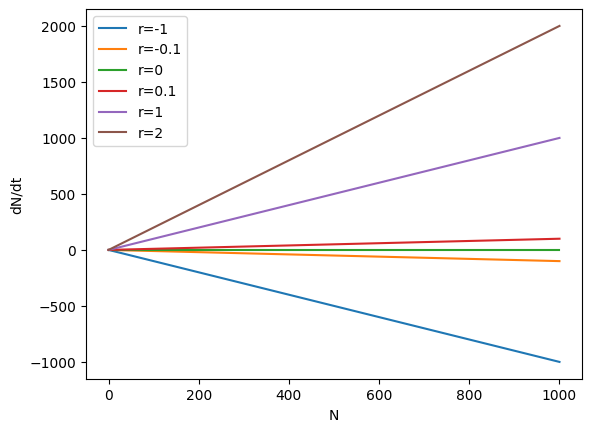

In [22]:
#GRAFICAR dN/dt contra N (EXPONENCIAL)
rs=[-1,-0.1,0,0.1,1,2]
valores_N=np.linspace(0,1000,1000)
for r in rs:
    plt.plot(valores_N,ode_exponencial(valores_N,r),label=f'r={r}')

plt.xlabel('N')
plt.ylabel('dN/dt')
plt.legend()
plt.show()

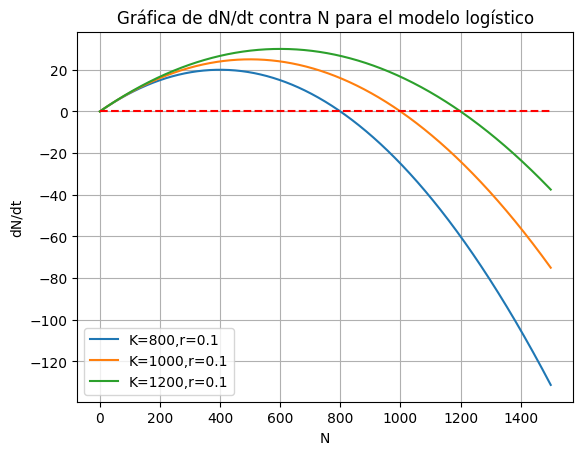

In [23]:
#GRAFICAR dN/dt contra N (LOGISTICO)

ks=[800,1000,1200]
r=0.1
valores_N=np.linspace(0,1500,1000)
for k in ks:
    plt.plot(valores_N,ode_logistica(valores_N,r,k),label=f'K={k},r=0.1')

plt.plot([0,1500],[0,0],color="red",linestyle="--")
plt.grid()
plt.title("Gráfica de dN/dt contra N para el modelo logístico")
plt.xlabel('N')
plt.ylabel('dN/dt')
plt.legend()
plt.show()

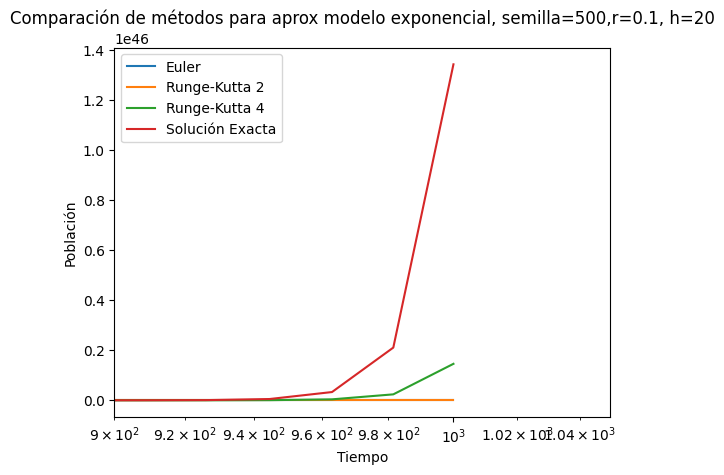

In [24]:
#COMPARANDO METODOS PARA MODELO EXPONENCIAL
tiempo = np.linspace(0, 1000, 55)
r = 0.1
n0=500
lambda_exp=lambda y: ode_exponencial(y,r)
euler_values = euler_method(lambda_exp, n0, tiempo)
rk2_values = runge_kutta2_method(lambda_exp, n0, tiempo)
rk4_values = runge_kutta4_method(lambda_exp, n0, tiempo)
exact_solution = sol_exponencial(n0, r, tiempo)

plt.plot(tiempo, euler_values, label='Euler')
plt.plot(tiempo, rk2_values, label='Runge-Kutta 2')
plt.plot(tiempo, rk4_values, label='Runge-Kutta 4')
plt.plot(tiempo, exact_solution, label='Solución Exacta')
plt.xscale('log')
plt.xlim(900,1050)
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.title(f'Comparación de métodos para aprox modelo exponencial, semilla={n0},r={r}, h=20')
plt.legend()
plt.show()

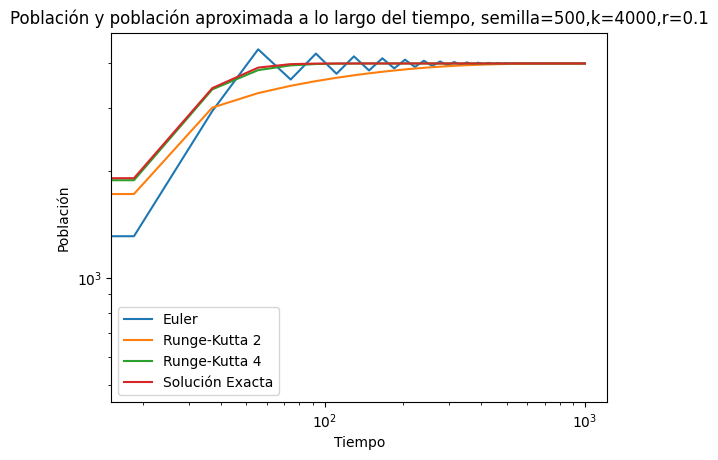

In [25]:
#COMPARANDO METODOS PARA MODELO LOGISTICO

tiempo = np.linspace(0, 1000, 55)
r = 0.1
k = 4000
n0=500

lambda_ode_log=lambda y: ode_logistica(y,r,k)

euler_values = euler_method(lambda_ode_log, n0, tiempo)
rk2_values = runge_kutta2_method(lambda_ode_log, n0, tiempo)
rk4_values = runge_kutta4_method(lambda_ode_log, n0, tiempo)
exact_solution = sol_logistica(n0, k, r, tiempo)

plt.plot(tiempo, euler_values, label='Euler')
plt.plot(tiempo, rk2_values, label='Runge-Kutta 2')
plt.plot(tiempo, rk4_values, label='Runge-Kutta 4')
plt.plot(tiempo, exact_solution, label='Solución Exacta')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.title(f'Población y población aproximada a lo largo del tiempo, semilla={n0},k={k},r={r}')
plt.legend()
plt.show()


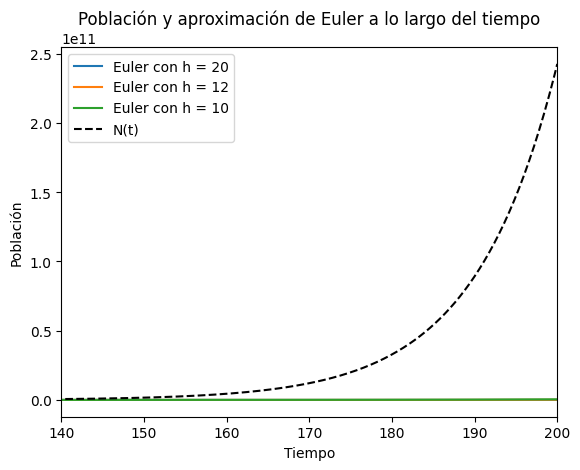

In [26]:
#MODELO EXPONENCIAL, EULER
tiempo1 = np.linspace(0, 200, 10)
tiempo2= np.linspace(0, 200, 15)
tiempo3= np.linspace(0, 200, 20)
r = 0.1
k = 4000
n0=500

lambda_ode_exp=lambda y: ode_exponencial(y,r)

euler_values1 = euler_method(lambda_ode_exp, n0, tiempo1)
euler_values2 = euler_method(lambda_ode_exp, n0, tiempo2)
euler_values3 = euler_method(lambda_ode_exp, n0, tiempo3)

exact_solution = sol_exponencial(n0, r, np.linspace(0,200,1000))

plt.plot(tiempo1, euler_values1, label='Euler con h = 20')
plt.plot(tiempo2, euler_values2, label='Euler con h = 12')
plt.plot(tiempo3, euler_values3, label='Euler con h = 10')
plt.plot(np.linspace(0,200,1000), exact_solution, label='N(t)',linestyle="--",color="black")
plt.xlabel('Tiempo')
plt.ylabel('Población')
# plt.yscale('log')
plt.xlim(140,200)
plt.title(f'Población y aproximación de Euler a lo largo del tiempo')
plt.legend()
plt.show()

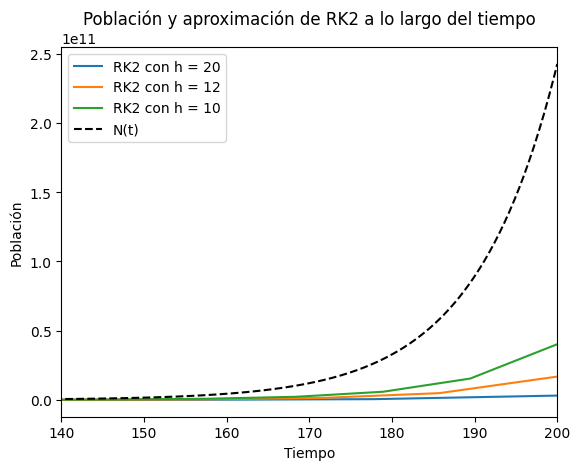

In [27]:
#MODELO EXPONENCIAL, RK2
tiempo1 = np.linspace(0, 200, 10)
tiempo2= np.linspace(0, 200, 15)
tiempo3= np.linspace(0, 200, 20)
r = 0.1
k = 4000
n0=500

lambda_ode_exp=lambda y: ode_exponencial(y,r)

rk2_values1 = runge_kutta2_method(lambda_ode_exp, n0, tiempo1)
rk2_values2 = runge_kutta2_method(lambda_ode_exp, n0, tiempo2)
rk2_values3 = runge_kutta2_method(lambda_ode_exp, n0, tiempo3)

exact_solution = sol_exponencial(n0, r, np.linspace(0,200,1000))

plt.plot(tiempo1, rk2_values1, label='RK2 con h = 20')
plt.plot(tiempo2, rk2_values2, label='RK2 con h = 12')
plt.plot(tiempo3, rk2_values3, label='RK2 con h = 10')
plt.plot(np.linspace(0,200,1000), exact_solution, label='N(t)',linestyle="--",color="black")
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.xlim(140,200)
plt.title(f'Población y aproximación de RK2 a lo largo del tiempo')
plt.legend()
plt.show()

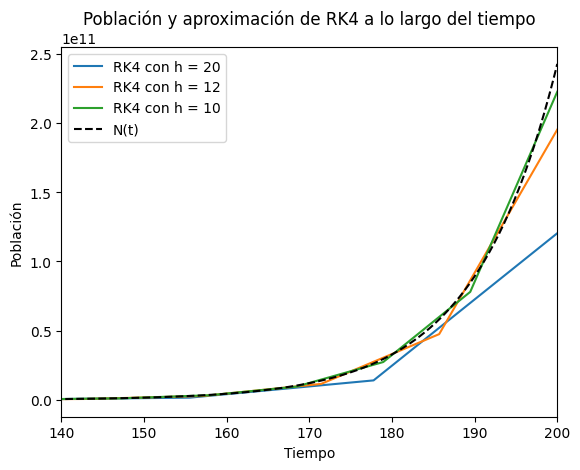

In [28]:
#MODELO EXPONENCIAL, RK4
tiempo1 = np.linspace(0, 200, 10)
tiempo2= np.linspace(0, 200, 15)
tiempo3= np.linspace(0, 200, 20)
r = 0.1
k = 4000
n0=500

lambda_ode_exp=lambda y: ode_exponencial(y,r)

rk4_values1 = runge_kutta4_method(lambda_ode_exp, n0, tiempo1)
rk4_values2 = runge_kutta4_method(lambda_ode_exp, n0, tiempo2)
rk4_values3 = runge_kutta4_method(lambda_ode_exp, n0, tiempo3)

exact_solution = sol_exponencial(n0, r, np.linspace(0,200,1000))


plt.xlim(140,200)
plt.plot(tiempo1, rk4_values1, label='RK4 con h = 20')
plt.plot(tiempo2, rk4_values2, label='RK4 con h = 12')
plt.plot(tiempo3, rk4_values3, label='RK4 con h = 10')
plt.plot(np.linspace(0,200,1000), exact_solution, label='N(t)',linestyle="--",color="black")
plt.xlabel('Tiempo')
plt.ylabel('Población')
# plt.yscale('log')
plt.title(f'Población y aproximación de RK4 a lo largo del tiempo')
plt.legend()
plt.show()

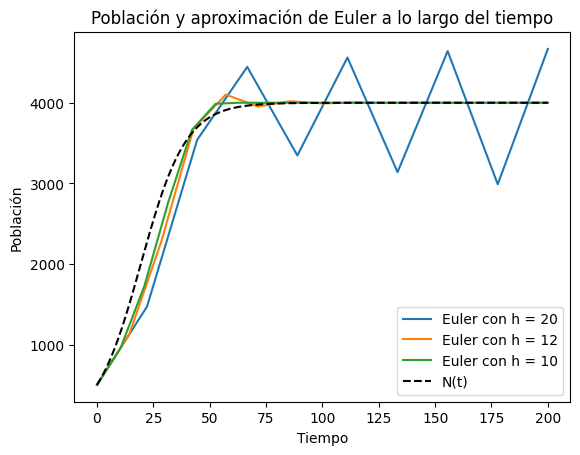

In [29]:
#MODELO LOGISTICO, EULER
tiempo1 = np.linspace(0, 200, 10)
tiempo2= np.linspace(0, 200, 15)
tiempo3= np.linspace(0, 200, 20)
r = 0.1
k = 4000
n0=500

lambda_ode_log=lambda y: ode_logistica(y,r,k)

euler_values1 = euler_method(lambda_ode_log, n0, tiempo1)
euler_values2 = euler_method(lambda_ode_log, n0, tiempo2)
euler_values3 = euler_method(lambda_ode_log, n0, tiempo3)

exact_solution = sol_logistica(n0, k, r, np.linspace(0,200,1000))

plt.plot(tiempo1, euler_values1, label='Euler con h = 20')
plt.plot(tiempo2, euler_values2, label='Euler con h = 12')
plt.plot(tiempo3, euler_values3, label='Euler con h = 10')
plt.plot(np.linspace(0,200,1000), exact_solution, label='N(t)',linestyle="--",color="black")
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.title(f'Población y aproximación de Euler a lo largo del tiempo')
plt.legend()
plt.show()

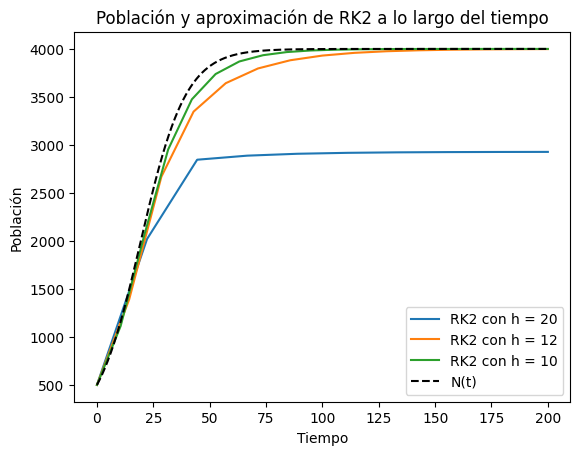

In [30]:
#MODELO LOGISTICO, RUNGE KUTTA 2
tiempo1 = np.linspace(0, 200, 10)
tiempo2= np.linspace(0, 200, 15)
tiempo3= np.linspace(0, 200, 20)
r = 0.1
k = 4000
n0=500

lambda_ode_log=lambda y: ode_logistica(y,r,k)

rk2_values1 = runge_kutta2_method(lambda_ode_log, n0, tiempo1)
rk2_values2 = runge_kutta2_method(lambda_ode_log, n0, tiempo2)
rk2_values3 = runge_kutta2_method(lambda_ode_log, n0, tiempo3)

exact_solution = sol_logistica(n0, k, r, np.linspace(0,200,1000))

plt.plot(tiempo1, rk2_values1, label='RK2 con h = 20')
plt.plot(tiempo2, rk2_values2, label='RK2 con h = 12')
plt.plot(tiempo3, rk2_values3, label='RK2 con h = 10')
plt.plot(np.linspace(0,200,1000), exact_solution, label='N(t)',linestyle="--",color="black")
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.title(f'Población y aproximación de RK2 a lo largo del tiempo')
plt.legend()
plt.show()

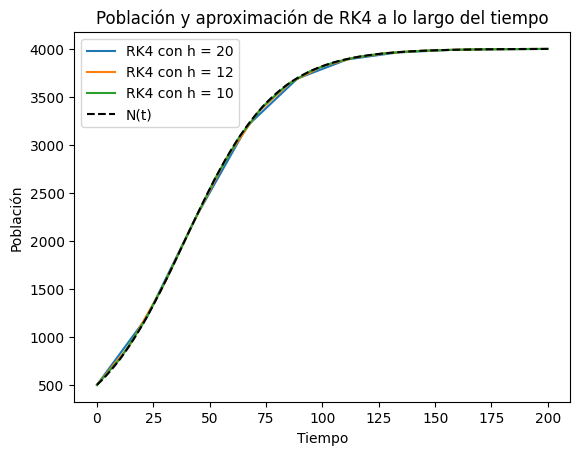

In [31]:
#MODELO LOGISTICO, RUNGE KUTTA 4
tiempo1 = np.linspace(0, 200, 10)
tiempo2= np.linspace(0, 200, 15)
tiempo3= np.linspace(0, 200, 20)
r = 0.05
k = 4000
n0l=500

lambda_ode_log=lambda y: ode_logistica(y,r,k)

rk4_values1 = runge_kutta4_method(lambda_ode_log, n0l, tiempo1)
rk4_values2 = runge_kutta4_method(lambda_ode_log, n0l, tiempo2)
rk4_values3 = runge_kutta4_method(lambda_ode_log, n0l, tiempo3)

exact_solution_logistic = sol_logistica(n0l, k, r, np.linspace(0,200,1000))


plt.plot(tiempo1, rk4_values1, label='RK4 con h = 20')
plt.plot(tiempo2, rk4_values2, label='RK4 con h = 12')
plt.plot(tiempo3, rk4_values3, label='RK4 con h = 10')
plt.plot(np.linspace(0,200,1000), exact_solution_logistic, label='N(t)',linestyle="--",color="black")
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.title(f'Población y aproximación de RK4 a lo largo del tiempo')
plt.legend()
plt.show()

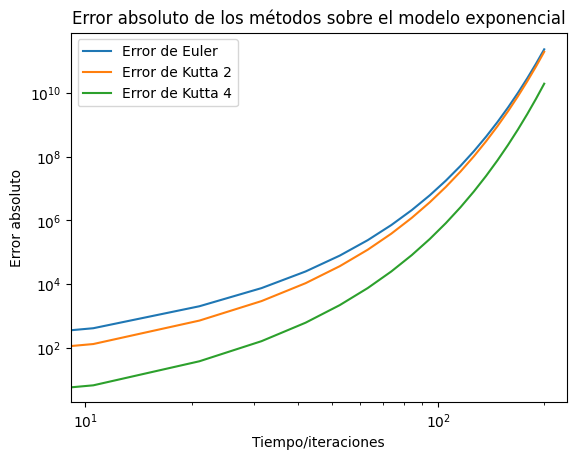

In [32]:
#GRAFICAR ERROR ABSOLUTO PARA MODELO EXPONENCIAL
n0=500
r=0.1
tiempo=np.linspace(0,200,20)

lambda_ode_exp=lambda y: ode_exponencial(y,r)
lambda_sol_exp=lambda y,t: sol_exponencial(y,r,t)

errorEuler = calcular_error_absoluto(euler_method, lambda_sol_exp, lambda_ode_exp, n0, tiempo)
plt.plot(tiempo, errorEuler, label="Error de Euler")

errorKutta2 = calcular_error_absoluto(runge_kutta2_method,lambda_sol_exp,lambda_ode_exp,n0,tiempo)
plt.plot(tiempo,errorKutta2,label="Error de Kutta 2")

errorKutta4 = calcular_error_absoluto(runge_kutta4_method,lambda_sol_exp,lambda_ode_exp,n0,tiempo)
plt.plot(tiempo,errorKutta4,label="Error de Kutta 4")

plt.yscale('log')
plt.xscale('log')
plt.xlabel('Tiempo/iteraciones')
plt.ylabel('Error absoluto')
plt.title('Error absoluto de los métodos sobre el modelo exponencial')
plt.legend()

plt.show()

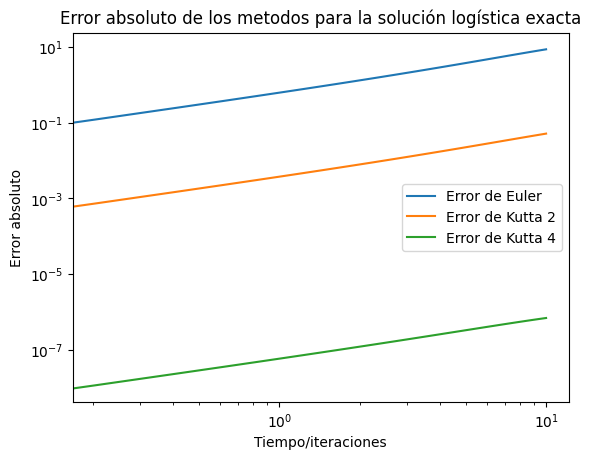

In [33]:
#GRAFICAR ERROR ABSOLUTO PARA MODELO LOGISTICO
n0=900
k=7000
r=0.1
tiempo=np.linspace(0,10,50)

lambda_ode_log=lambda y: ode_logistica(y,r,k)
lambda_sol_log = lambda y, t: sol_logistica(y, k, r, t)

errorEuler = calcular_error_absoluto(euler_method, lambda_sol_log, lambda_ode_log, n0, tiempo)
plt.plot(tiempo, errorEuler, label="Error de Euler")

errorKutta2 = calcular_error_absoluto(runge_kutta2_method,lambda_sol_log,lambda_ode_log,n0,tiempo)
plt.plot(tiempo,errorKutta2,label="Error de Kutta 2")

errorKutta4 = calcular_error_absoluto(runge_kutta4_method,lambda_sol_log,lambda_ode_log,n0,tiempo)
plt.plot(tiempo,errorKutta4,label="Error de Kutta 4")

plt.yscale('log')
plt.xscale('log')
plt.xlabel('Tiempo/iteraciones')
plt.ylabel('Error absoluto')
plt.title('Error absoluto de los metodos para la solución logística exacta')
plt.legend()

plt.show()

Actividad 2

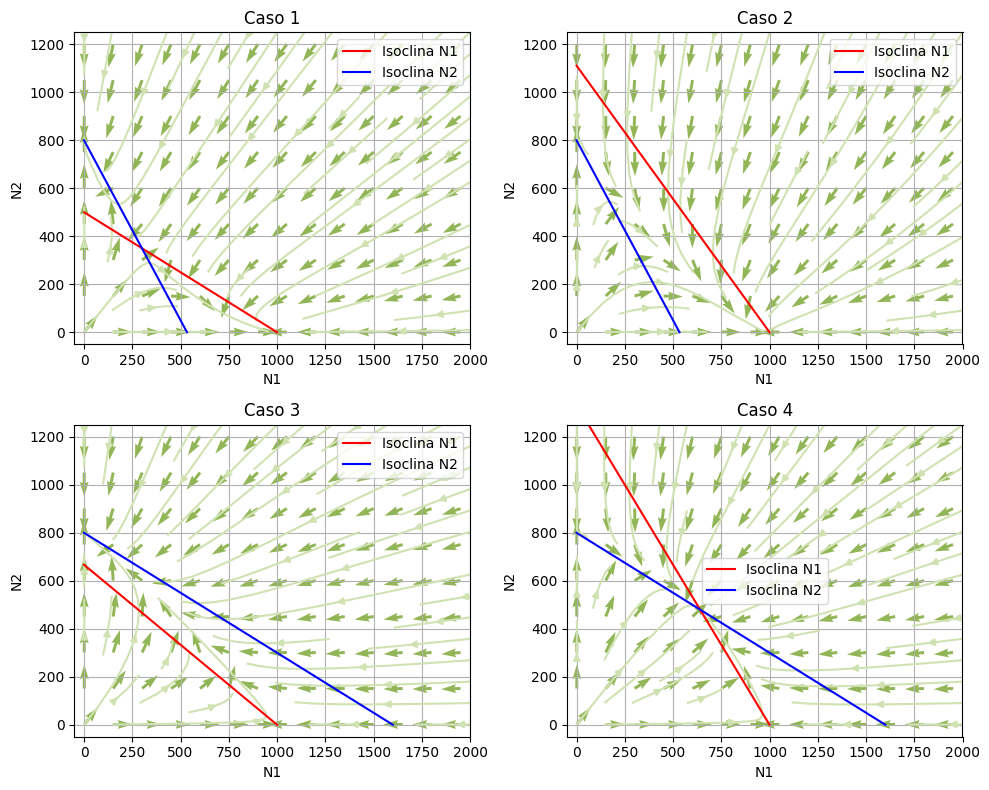

In [34]:
#ISOCLINAS
import numpy as np
import math
import matplotlib.pyplot as plt

def ode_volterra_N1(r1,N1,K1,alpha12,N2):
    return r1 * N1 * ((K1 - N1 - alpha12 * N2) / K1)

def ode_volterra_N2(r2,N2,K2,alpha21,N1):
    return r2 * N2 * ((K2 - N2 - alpha21 * N1) / K2)

def graficar_isoclinas(ax, k1, alpha12, k2, alpha21, r1, r2, title):
    u=[]
    v=[]
    for i in range(1,2000,150):
        for j in range(1,2000,150):
            ax.quiver([i],[j],[100*ode_volterra_N1(r1,i,k1,alpha12,j)/(math.sqrt(ode_volterra_N1(r1,i,k1,alpha12,j)**2+ode_volterra_N2(r2,j,k2,alpha21,i)**2))],[100*ode_volterra_N2(r2,j,k2,alpha21,i)/(math.sqrt(ode_volterra_N1(r1,i,k1,alpha12,j)**2+ode_volterra_N2(r2,j,k2,alpha21,i)**2))], angles='xy', scale_units='xy', scale=1, color='#92B657')
    ax.set_xlim(-50, 2000)
    ax.set_ylim(-50, 1250)
    X=np.linspace(1,2000,50)
    Y=np.linspace(1,1250,50)
    Xm,Ym=np.meshgrid(X,Y)
    u = 100 * ode_volterra_N1(r1, Xm, k1, alpha12, Ym) / np.sqrt(ode_volterra_N1(r1, Xm, k1, alpha12, Ym)**2 + ode_volterra_N2(r2, Ym, k2, alpha21, Xm)**2)
    v = 100 * ode_volterra_N2(r2, Ym, k2, alpha21, Xm) / np.sqrt(ode_volterra_N1(r1, Xm, k1, alpha12, Ym)**2 + ode_volterra_N2(r2, Ym, k2, alpha21, Xm)**2)
    ax.streamplot(Xm,Ym, u,v,density=0.5,color='#D0E2B2')
    ax.plot([k1, 0], [0, k1/alpha12], 'r', label='Isoclina N1')
    ax.plot([k2/alpha21, 0], [0, k2], 'b', label='Isoclina N2')
    ax.set_xlabel('N1')
    ax.set_ylabel('N2')
    ax.legend()
    ax.set_title(title)
    ax.grid(True)


# FIJO K1 = 1000 Y K2 = 800
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

r1=0.5
r2=0.5
k1 = 1000
k2 = 800

# caso 1:
alpha12 = 2
alpha21 = 1.5
graficar_isoclinas(axs[0, 0], k1,alpha12,k2,alpha21,r1,r2, 'Caso 1')

# caso 2:
alpha12 = 0.9
alpha21 = 1.5
graficar_isoclinas(axs[0, 1], k1,alpha12,k2,alpha21,r1,r2, 'Caso 2')

# caso 3:
alpha12 = 1.5
alpha21 = 0.5
graficar_isoclinas(axs[1, 0], k1,alpha12,k2,alpha21,r1,r2, 'Caso 3')

# caso 4:
alpha12 = 0.75
alpha21 = 0.5
graficar_isoclinas(axs[1, 1], k1,alpha12,k2,alpha21,r1,r2, 'Caso 4')

axs[0,0].legend(loc="upper right")
axs[0,1].legend(loc="upper right")
axs[1,0].legend(loc="upper right")
axs[1,1].legend(loc="upper right")

plt.legend()
plt.tight_layout()
plt.show()               

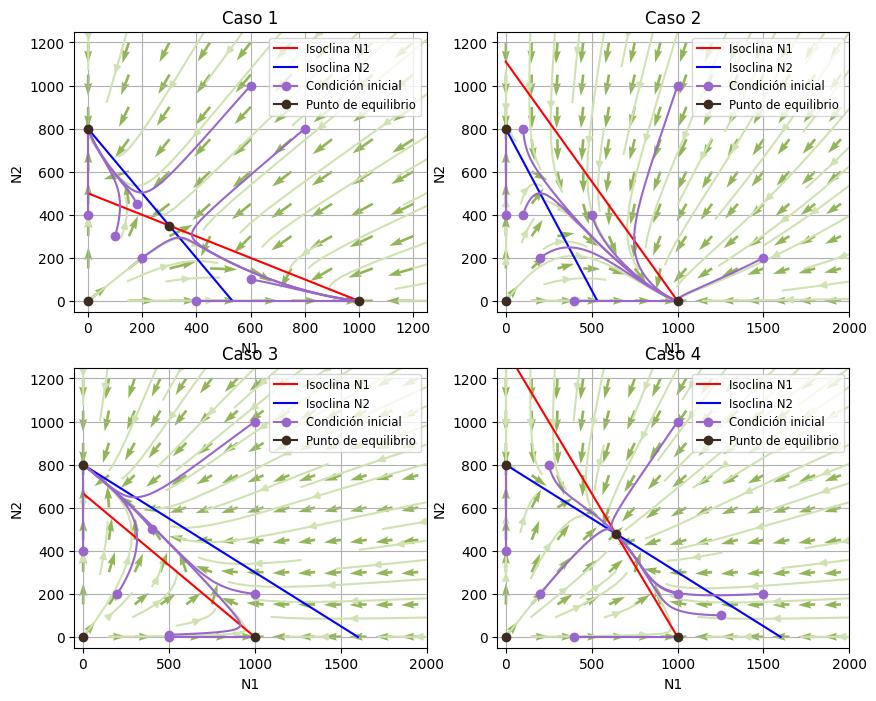

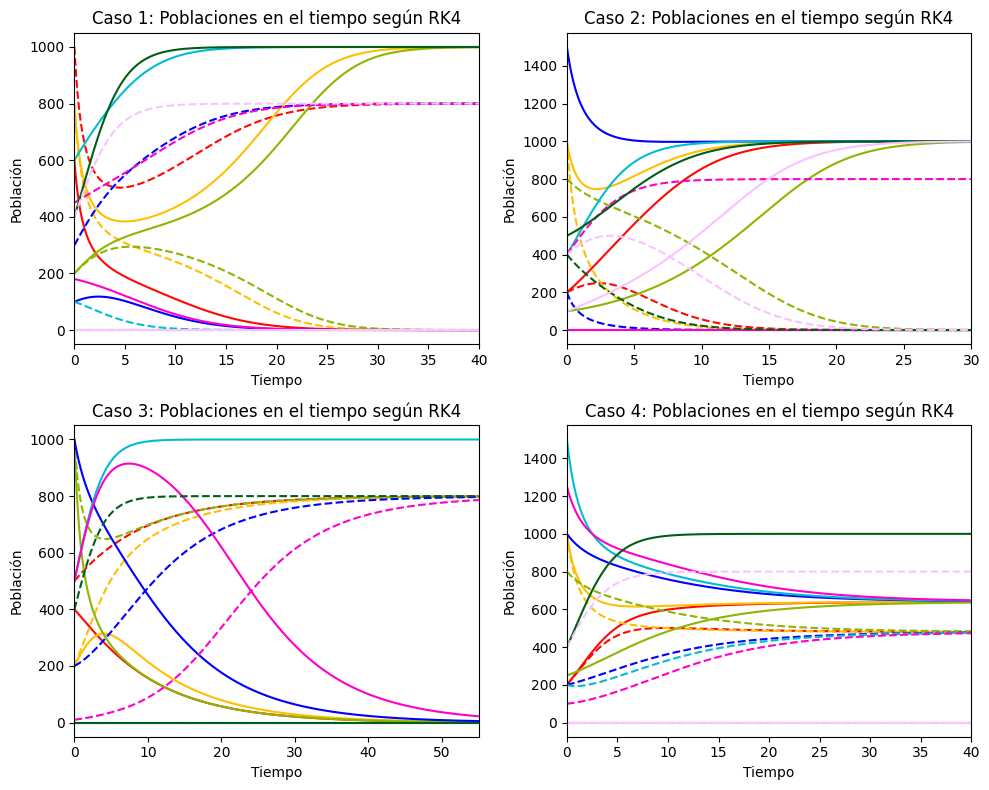

In [35]:
#ISOCLINAS + TRAYECTORIAS
import numpy as np
import matplotlib.pyplot as plt

def runge_kutta4_method_fg(f,g, n0, p0, tiempo):
    y_values = [n0]
    p_values=[p0]
    y = n0
    p=p0
    h = tiempo[1] - tiempo[0]

    for t in tiempo[1:]:
        k1N = h * f(y,p)
        k1P = h * g(y,p)
        k2N = h * f(y+ 0.5 * k1N,p + 0.5 * k1P)
        k2P = h * g(y+ 0.5 * k1N,p + 0.5 * k1P)
        k3P = h * g(y+ 0.5 * k2N,p + 0.5 * k2P)
        k3N = h * f(y+ 0.5 * k2N,p + 0.5 * k2P)
        k4N = h * f(y+k3N,p + k3P)
        k4P = h * g(y+k3N,p + k3P)
        y += (k1N + 2*k2N + 2*k3N + k4N) / 6
        p += (k1P + 2*k2P + 2*k3P + k4P) / 6
        y_values.append(y)
        p_values.append(p)

    return y_values,p_values


tiempo=np.linspace(0,100,1000)

# FIJO K1 = 1000 Y K2 = 800
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig2, series_t = plt.subplots(2, 2, figsize=(10, 8))
colores=['#FF0800', '#FFBF00', '#8DB600', '#0000FF', "#00BDD2", "#FF00C8","#005E17", '#FBC2FF']

r1=0.5
r2=0.5
k1 = 1000
k2 = 800

# caso 1:
label_added = False
alpha12 = 2
alpha21 = 1.5
graficar_isoclinas(axs[0, 0], k1,alpha12,k2,alpha21,r1,r2, 'Caso 1')
lambda_ode_N1_1=lambda n1,n2: ode_volterra_N1(r1,n1,k1,alpha12,n2)
lambda_ode_N2_1=lambda n1,n2: ode_volterra_N2(r2,n2,k2,alpha21,n1)
iniciales=[(600,1000),(800,800),(200,200), (100,300), (600,100), (180,450), (400,0), (0,400)]
for i in range(0,len(iniciales)):
    if not label_added:
        axs[0, 0].plot((iniciales[i])[0], (iniciales[i])[1], marker='o', color='#9966CC',label='Condición inicial')
        label_added=True
    else:
        axs[0, 0].plot(iniciales[i][0], iniciales[i][1], marker='o', color='#9966CC')
    N1s,N2s=runge_kutta4_method_fg(lambda_ode_N1_1,lambda_ode_N2_1, iniciales[i][0], iniciales[i][1], tiempo)
    axs[0, 0].plot(N1s,N2s,c="#9966CC")
    series_t[0,0].plot(tiempo,N1s,c=colores[i])
    series_t[0,0].plot(tiempo,N2s,c=colores[i],linestyle='dashed')
series_t[0,0].set_xlim(0,40)
series_t[0,0].set_title("Caso 1: Poblaciones en el tiempo según RK4")
axs[0,0].set_xlim(-50, 1250)
axs[0, 0].plot(0, 0, marker='o', color='#3D2B1F',label='Punto de equilibrio')
axs[0, 0].plot(1000, 0, marker='o', color='#3D2B1F')
axs[0, 0].plot(0, 800, marker='o', color='#3D2B1F')
axs[0, 0].plot(300, 350, marker='o', color='#3D2B1F')

# caso 2:
label_added = False
alpha12 = 0.9
alpha21 = 1.5
graficar_isoclinas(axs[0, 1], k1,alpha12,k2,alpha21,r1,r2, 'Caso 2')
lambda_ode_N1_2=lambda n1,n2: ode_volterra_N1(r1,n1,k1,alpha12,n2)
lambda_ode_N2_2=lambda n1,n2: ode_volterra_N2(r2,n2,k2,alpha21,n1)
iniciales=[(200,200),(1000,1000), (100,800), (1500,200), (400,0), (0,400), (500,400), (100,400)]
for i in range(0,len(iniciales)):
    if not label_added:
        axs[0, 1].plot(iniciales[i][0], iniciales[i][1], marker='o', color='#9966CC',label='Condición inicial')
        label_added=True
    else:
        axs[0, 1].plot(iniciales[i][0], iniciales[i][1], marker='o', color='#9966CC')
    N1s,N2s=runge_kutta4_method_fg(lambda_ode_N1_2,lambda_ode_N2_2, iniciales[i][0], iniciales[i][1], tiempo)
    axs[0, 1].plot(N1s,N2s,c="#9966CC")
    series_t[0,1].plot(tiempo,N1s,c=colores[i])
    series_t[0,1].plot(tiempo,N2s,c=colores[i],linestyle='dashed')
series_t[0,1].set_xlim(0,30)
series_t[0,1].set_title("Caso 2: Poblaciones en el tiempo según RK4")
axs[0, 1].plot(0, 0, marker='o', color='#3D2B1F',label='Punto de equilibrio')
axs[0, 1].plot(1000, 0, marker='o', color='#3D2B1F')
axs[0, 1].plot(0, 800, marker='o', color='#3D2B1F')

# caso 3:
label_added = False
alpha12 = 1.5
alpha21 = 0.5
graficar_isoclinas(axs[1, 0], k1,alpha12,k2,alpha21,r1,r2, 'Caso 3')
lambda_ode_N1_3=lambda n1,n2: ode_volterra_N1(r1,n1,k1,alpha12,n2)
lambda_ode_N2_3=lambda n1,n2: ode_volterra_N2(r2,n2,k2,alpha21,n1)
iniciales=[(400,500),(200,200),(1000,1000),(1000,200),(500,0),(500,10), (0,400)]
for i in range(0,len(iniciales)):
    if not label_added:
        axs[1, 0].plot(iniciales[i][0], iniciales[i][1], marker='o', color='#9966CC',label='Condición inicial')
        label_added=True
    else:
        axs[1, 0].plot(iniciales[i][0], iniciales[i][1], marker='o', color='#9966CC')
    N1s,N2s=runge_kutta4_method_fg(lambda_ode_N1_3,lambda_ode_N2_3, iniciales[i][0], iniciales[i][1], tiempo)
    axs[1, 0].plot(N1s,N2s,c="#9966CC")
    series_t[1,0].plot(tiempo,N1s,c=colores[i])
    series_t[1,0].plot(tiempo,N2s,c=colores[i],linestyle='dashed')
series_t[1,0].set_xlim(0,55)
series_t[1,0].set_title("Caso 3: Poblaciones en el tiempo según RK4")
axs[1, 0].plot(0, 0, marker='o', color='#3D2B1F',label='Punto de equilibrio')
axs[1, 0].plot(1000, 0, marker='o', color='#3D2B1F')
axs[1, 0].plot(0, 800, marker='o', color='#3D2B1F')

# caso 4:
label_added = False
alpha12 = 0.75
alpha21 = 0.5
graficar_isoclinas(axs[1, 1], k1,alpha12,k2,alpha21,r1,r2, 'Caso 4')
lambda_ode_N1_4=lambda n1,n2: ode_volterra_N1(r1,n1,k1,alpha12,n2)
lambda_ode_N2_4=lambda n1,n2: ode_volterra_N2(r2,n2,k2,alpha21,n1)
iniciales=[(200,200),(1000,1000), (250,800),(1000,200),(1500,200),(1250,100), (400,0), (0,400)]
for i in range(0,len(iniciales)):
    if not label_added:
        axs[1, 1].plot(iniciales[i][0], iniciales[i][1], marker='o', color='#9966CC',label='Condición inicial')
        label_added=True
    else:
        axs[1, 1].plot(iniciales[i][0], iniciales[i][1], marker='o', color='#9966CC')
    N1s,N2s=runge_kutta4_method_fg(lambda_ode_N1_4,lambda_ode_N2_4, iniciales[i][0], iniciales[i][1], tiempo)
    axs[1, 1].plot(N1s,N2s,c="#9966CC")
    series_t[1,1].plot(tiempo,N1s,c=colores[i])
    series_t[1,1].plot(tiempo,N2s,c=colores[i],linestyle='dashed')
series_t[1,1].set_xlim(0,40)
series_t[1,1].set_title("Caso 4: Poblaciones en el tiempo según RK4")
axs[1, 1].plot(0, 0, marker='o', color='#3D2B1F',label='Punto de equilibrio')
axs[1, 1].plot(1000, 0, marker='o', color='#3D2B1F')
axs[1, 1].plot(0, 800, marker='o', color='#3D2B1F')
axs[1, 1].plot(640, 480, marker='o', color='#3D2B1F')

axs[0,0].legend(loc="upper right", fontsize='small')
axs[0,1].legend(loc="upper right", fontsize='small')
axs[1,0].legend(loc="upper right", fontsize='small')
axs[1,1].legend(loc="upper right", fontsize='small')

series_t[0,0].set_xlabel('Tiempo')
series_t[0,0].set_ylabel('Población')
series_t[0,1].set_xlabel('Tiempo')
series_t[0,1].set_ylabel('Población')
series_t[1,0].set_xlabel('Tiempo')
series_t[1,0].set_ylabel('Población')
series_t[1,1].set_xlabel('Tiempo')
series_t[1,1].set_ylabel('Población')





plt.tight_layout()
plt.show()


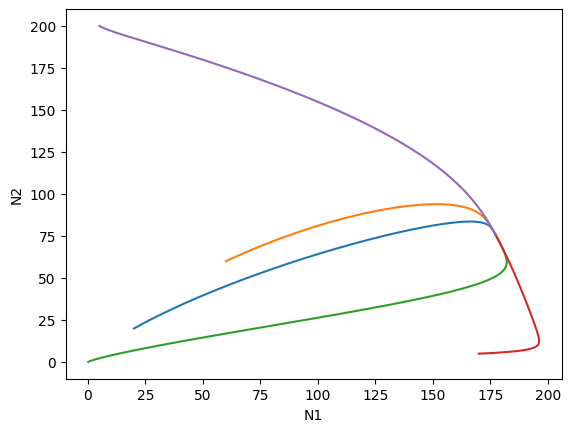

In [36]:
#DIAGRAMA DE FASES N1 VS N2
alpha12=0.3
alpha21=0.7
r1=0.5
r2=0.4
k1=200
k2=200
tiempo=np.linspace(0,400,6000)

def runge_kutta4_method(f,g, n0, p0, tiempo):
    y_values = [n0]
    p_values=[p0]
    y = n0
    p=p0
    h = tiempo[1] - tiempo[0]

    for t in tiempo[1:]:
        k1N = h * f(y,p)
        k1P = h * g(y,p)
        k2N = h * f(y+ 0.5 * k1N,p + 0.5 * k1P)
        k2P = h * g(y+ 0.5 * k1N,p + 0.5 * k1P)
        k3P = h * g(y+ 0.5 * k2N,p + 0.5 * k2P)
        k3N = h * f(y+ 0.5 * k2N,p + 0.5 * k2P)
        k4N = h * f(y+k3N,p + k3P)
        k4P = h * g(y+k3N,p + k3P)
        y += (k1N + 2*k2N + 2*k3N + k4N) / 6
        p += (k1P + 2*k2P + 2*k3P + k4P) / 6
        y_values.append(y)
        p_values.append(p)

    return y_values,p_values

lambda_ode_N1=lambda n1,n2: ode_volterra_N1(r1,n1,k1,alpha12,n2)
lambda_ode_N2=lambda n1,n2: ode_volterra_N2(r2,n2,k2,alpha21,n1)

N1s,N2s=runge_kutta4_method(lambda_ode_N1,lambda_ode_N2, 20,20, tiempo)

#plt.plot(runge_kutta4_method(lambda_ode_N1,lambda_ode_N2, N1_0,N2_0, tiempo))
plt.plot(N1s,N2s)
N1s,N2s=runge_kutta4_method(lambda_ode_N1,lambda_ode_N2, 60,60, tiempo)
plt.plot(N1s,N2s)
N1s,N2s=runge_kutta4_method(lambda_ode_N1,lambda_ode_N2, 0.1,0.1, tiempo)
plt.plot(N1s,N2s)
N1s,N2s=runge_kutta4_method(lambda_ode_N1,lambda_ode_N2, 170,5, tiempo)
plt.plot(N1s,N2s)
N1s,N2s=runge_kutta4_method(lambda_ode_N1,lambda_ode_N2, 5,200, tiempo)
plt.plot(N1s,N2s)
plt.xlabel('N1')
plt.ylabel('N2')
plt.show()


Actividad 3

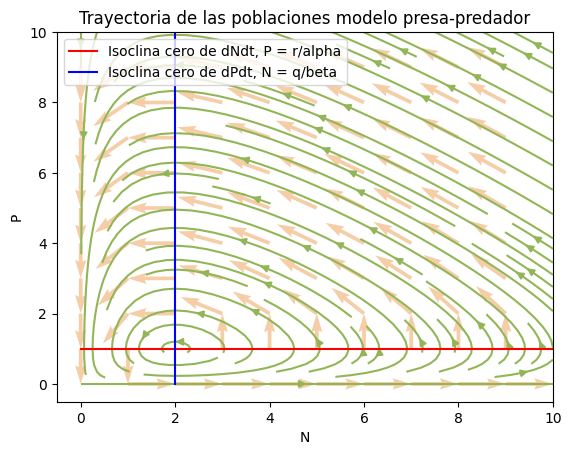

In [37]:
#PRESA-PREDADOR
def norma(vector):
    return math.sqrt(vector[0]**2 + vector[1]**2)

import numpy as np
import matplotlib.pyplot as plt

q=0.8
alpha=0.5
beta=0.4
r=0.5

# Define the grid
x = np.linspace(0, 10, 100)
y = np.linspace(0, 10, 100)
X, Y = np.meshgrid(x, y)

# Define velocity components
def velocity_function(N, P,alpha, beta, r, q):
    u = r*N - alpha*N*P
    v = beta*N*P - q*P
    return u, v

# Calculate velocity vectors
u, v = velocity_function(X, Y, alpha, beta, r, q)

# Plot streamlines
plt.streamplot(X, Y, u, v,density=1,color='#92B657')
#graficar isoclinas
plt.plot([0, 10], [r/alpha, r/alpha], 'r', label='Isoclina cero de dNdt, P = r/alpha')
plt.plot([q/beta, q/beta], [0, 10], 'b', label='Isoclina cero de dPdt, N = q/beta')
#graficar quivers
for i in range(0,10,1):
    for j in range(0,10,1):
        if not (i==2 and j==1) and not(i==0 and j==0):
            plt.quiver([i],[j],(velocity_function(i,j,alpha,beta,r,q)[0])/norma(velocity_function(i,j,alpha,beta,r,q)),(velocity_function(i,j,alpha,beta,r,q)[1])/norma(velocity_function(i,j,alpha,beta,r,q)), angles='xy', scale_units='xy', scale=1, color='#F5CDA7')
plt.xlabel('N')
plt.ylabel('P')
plt.title('Trayectoria de las poblaciones modelo presa-predador')
plt.legend()
plt.show()

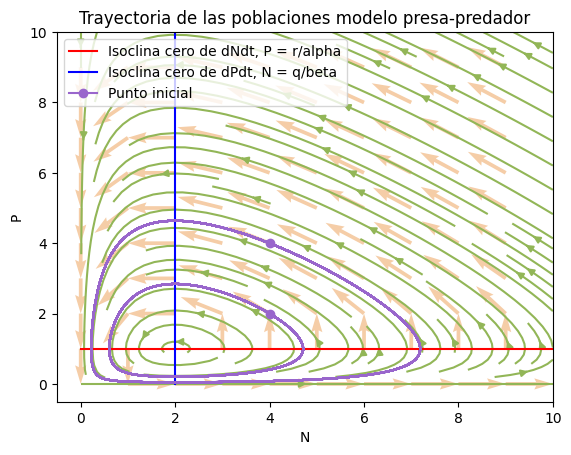

In [38]:
#PRESA-PREDADOR
def norma(vector):
    return math.sqrt(vector[0]**2 + vector[1]**2)

import numpy as np
import matplotlib.pyplot as plt

q=0.8
alpha=0.5
beta=0.4
r=0.5

# Define the grid
x = np.linspace(0, 10, 100)
y = np.linspace(0, 10, 100)
X, Y = np.meshgrid(x, y)

# Define velocity components
def velocity_function(N, P,alpha, beta, r, q):
    u = r*N - alpha*N*P
    v = beta*N*P - q*P
    return u, v

# Calculate velocity vectors
u, v = velocity_function(X, Y, alpha, beta, r, q)

# Plot streamlines
plt.streamplot(X, Y, u, v,density=1,color='#92B657')
#graficar isoclinas
plt.plot([0, 10], [r/alpha, r/alpha], 'r', label='Isoclina cero de dNdt, P = r/alpha')
plt.plot([q/beta, q/beta], [0, 10], 'b', label='Isoclina cero de dPdt, N = q/beta')
#graficar quivers
for i in range(0,10,1):
    for j in range(0,10,1):
        if not (i==2 and j==1) and not(i==0 and j==0):
            plt.quiver([i],[j],(velocity_function(i,j,alpha,beta,r,q)[0])/norma(velocity_function(i,j,alpha,beta,r,q)),(velocity_function(i,j,alpha,beta,r,q)[1])/norma(velocity_function(i,j,alpha,beta,r,q)), angles='xy', scale_units='xy', scale=1, color='#F5CDA7')
plt.xlabel('N')
plt.ylabel('P')
plt.title('Trayectoria de las poblaciones modelo presa-predador')

lambda_ode_N=lambda n,p: r*n-alpha*n*p
lambda_ode_P=lambda n,p: beta*n*p-q*p
plt.plot(4, 4, marker='o', color='#9966CC',label='Punto inicial')
N,P=runge_kutta4_method_fg(lambda_ode_N,lambda_ode_P, 4, 4, np.linspace(0,500,10000))
plt.plot(N,P,c="#9966CC")
#tiempo=np.linspace(0,400,6000)

plt.plot(4, 2, marker='o', color='#9966CC')
N,P=runge_kutta4_method_fg(lambda_ode_N,lambda_ode_P, 4, 2, np.linspace(0,500,10000))
plt.plot(N,P,c="#9966CC")

plt.legend()
plt.show()

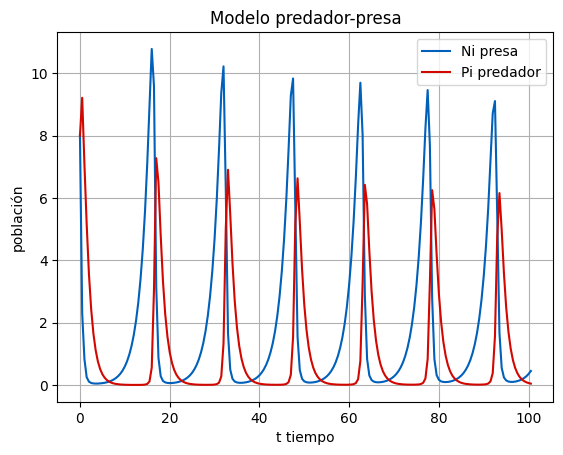

In [39]:
#PRESA-PREDADOR LOTKA VOLTERRA EN EL TIEMPO CON LOS VALORES DE LAS ISOCLINAS.
import numpy as np
import matplotlib.pyplot as plt

def rungekutta4_fg(f,g,t0,N0,P0,h,muestras):
    tamano = muestras + 1
    tabla = np.zeros(shape=(tamano,3),dtype=float)
    tabla[0] = [t0,N0,P0]
    ti = t0
    Ni = N0
    Pi = P0
    for i in range(1,tamano,1):
        K1x = h * f(ti,Ni,Pi)
        K1y = h * g(ti,Ni,Pi)
        
        K2x = h * f(ti+h/2, Ni + K1x/2, Pi+K1y/2)
        K2y = h * g(ti+h/2, Ni + K1x/2, Pi+K1y/2)

        K3x = h * f(ti+h/2, Ni + K2x/2, Pi+K2y/2)
        K3y = h * g(ti+h/2, Ni + K2x/2, Pi+K2y/2)

        K4x = h * f(ti+h, Ni + K3x, Pi+K3y)
        K4y = h * g(ti+h, Ni + K3x, Pi+K3y)

        Ni = Ni + (1/6)*(K1x+2*K2x+2*K3x+K4x)
        Pi = Pi + (1/6)*(K1y+2*K2y+2*K3y+K4y)
        ti = ti + h
        
        tabla[i] = [ti,Ni,Pi]
    tabla = np.array(tabla)
    return(tabla)


r = 0.5
q = 0.8
alpha = 0.5
beta = 0.4

presa = lambda t,N,P : r*N - alpha*N*P
predador = lambda t,N,P : beta*N*P - q*P

t0 = 0
N0 = 6
P0 = 6

h = 0.5
muestras = 201

colores = [('#D20700', '#FF7E79'),('#43A700', '#96FF50'),('#0060BA', '#6DB8FF')]

tabla = rungekutta4_fg(presa,predador,t0,8,8,h,muestras)
tiRK4 = tabla[:,0]
NiRK4 = tabla[:,1]
PiRK4 = tabla[:,2]
np.set_printoptions(precision=6)
plt.plot(tiRK4,NiRK4, label='Ni presa', color = colores[2][0])
plt.plot(tiRK4,PiRK4, label='Pi predador', color = colores[0][0])

plt.title('Modelo predador-presa')
plt.xlabel('t tiempo')
plt.ylabel('población')
plt.legend()
plt.grid()
plt.show()

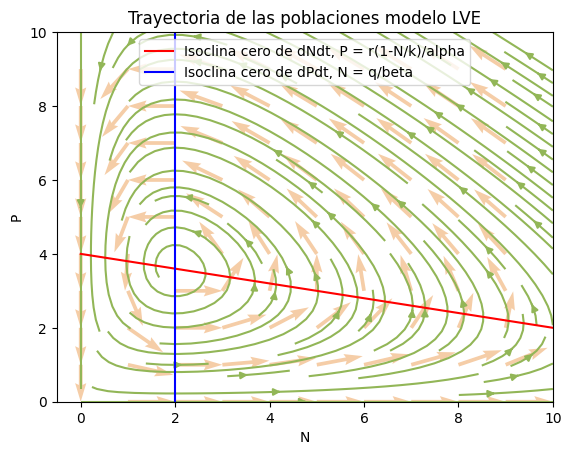

In [40]:
#PRESA-PREDADOR LVE

import numpy as np
import matplotlib.pyplot as plt

q=0.8
alpha=0.5
beta=0.4
r=2
k=20

# definir meshgrid para grilla
x = np.linspace(0, 10, 100)
y = np.linspace(0, 10, 100)
X, Y = np.meshgrid(x, y)

# Define velocity components
def velocity_function(N, P,alpha, beta, r, q,k):
    u = r*N*(1-N/k) - alpha*N*P
    v = beta*N*P - q*P
    return u, v
#esta es la recta de la isoclina de N
def dPdtequals0(r,N,k,alpha):
    return (-r+r*N/k)/(-alpha)
#calc vectores velocidad
u, v = velocity_function(X, Y, alpha, beta, r, q,k)

#streamplot
plt.streamplot(X, Y, u, v,density=1,color='#92B657')
#graficar isoclinas
plt.plot(np.linspace(0,10,100), dPdtequals0(r,x,k,alpha), 'r', label='Isoclina cero de dNdt, P = r(1-N/k)/alpha')
plt.plot([q/beta, q/beta], [0, 10], 'b', label='Isoclina cero de dPdt, N = q/beta')
#graficar quivers
for i in range(0,10,1):
    for j in range(0,10,1):
        if not (i==2 and j==4) and not(i==0 and j==0):
            plt.quiver([i],[j],(velocity_function(i,j,alpha,beta,r,q,k)[0])/norma(velocity_function(i,j,alpha,beta,r,q,k)),(velocity_function(i,j,alpha,beta,r,q,k)[1])/norma(velocity_function(i,j,alpha,beta,r,q,k)), angles='xy', scale_units='xy', scale=1, color='#F5CDA7')
###
plt.ylim(0,10)
plt.xlabel('N')
plt.ylabel('P')
plt.title('Trayectoria de las poblaciones modelo LVE')
plt.legend()
plt.show()

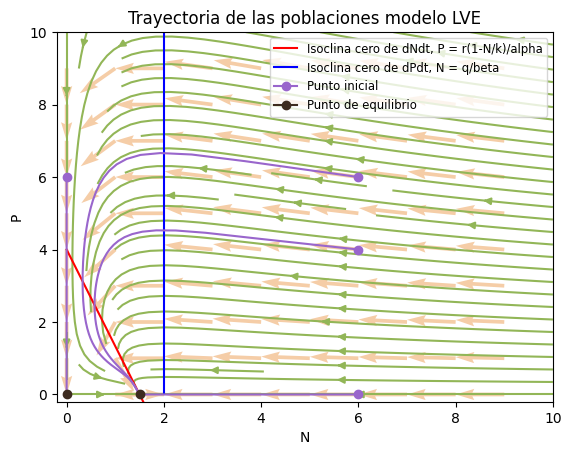

In [41]:
#PRESA-PREDADOR LVE

import numpy as np
import matplotlib.pyplot as plt

def ode_N_Volterra_LVE(N, P,alpha, r,k):
    u = r*N*(1-N/k) - alpha*N*P
    return u
def ode_P_Volterra_LVE(N, P, beta, q):
    v = beta*N*P - q*P
    return v

q=0.8
alpha=0.5
beta=0.4
r=2
k=1.5

# definir meshgrid para grilla
x = np.linspace(0, 10, 100)
y = np.linspace(0, 10, 100)
X, Y = np.meshgrid(x, y)

# Define velocity components
def velocity_function(N, P,alpha, beta, r, q,k):
    u = r*N*(1-N/k) - alpha*N*P
    v = beta*N*P - q*P
    return u, v
#esta es la recta de la isoclina de N
def dPdtequals0(r,N,k,alpha):
    return (-r+r*N/k)/(-alpha)
#calc vectores velocidad
u, v = velocity_function(X, Y, alpha, beta, r, q,k)

#streamplot
plt.streamplot(X, Y, u, v,density=1,color='#92B657')
#graficar isoclinas
plt.plot(np.linspace(0,10,100), dPdtequals0(r,x,k,alpha), 'r', label='Isoclina cero de dNdt, P = r(1-N/k)/alpha')
plt.plot([q/beta, q/beta], [0, 10], 'b', label='Isoclina cero de dPdt, N = q/beta')
#graficar quivers
for i in range(0,10,1):
    for j in range(0,10,1):
        if not (i==2 and j==4) and not(i==0 and j==0):
            plt.quiver([i],[j],(velocity_function(i,j,alpha,beta,r,q,k)[0])/norma(velocity_function(i,j,alpha,beta,r,q,k)),(velocity_function(i,j,alpha,beta,r,q,k)[1])/norma(velocity_function(i,j,alpha,beta,r,q,k)), angles='xy', scale_units='xy', scale=1, color='#F5CDA7')
###
plt.ylim(0,10)
plt.xlabel('N')
plt.ylabel('P')
plt.title('Trayectoria de las poblaciones modelo LVE')

lambda_ode_N=lambda n,p: ode_N_Volterra_LVE(n, p,alpha, r,k)
lambda_ode_P=lambda n,p: ode_P_Volterra_LVE(n, p,beta, q)

N_0 = 6
P_0 = 6
Ns,Ps=runge_kutta4_method_fg(lambda_ode_N,lambda_ode_P, N_0,P_0, tiempo)
plt.plot(Ns,Ps, color='#9966CC')

N_0 = 0
P_0 = 6
Ns,Ps=runge_kutta4_method_fg(lambda_ode_N,lambda_ode_P, N_0,P_0, tiempo)
plt.plot(Ns,Ps, color='#9966CC')

N_0 = 6
P_0 = 0
Ns,Ps=runge_kutta4_method_fg(lambda_ode_N,lambda_ode_P, N_0,P_0, tiempo)
plt.plot(Ns,Ps, color='#9966CC')

N_0 = 6
P_0 = 4
Ns,Ps=runge_kutta4_method_fg(lambda_ode_N,lambda_ode_P, N_0,P_0, tiempo)
plt.plot(Ns,Ps, color='#9966CC')

plt.plot(0, 6, marker='o', color='#9966CC',label='Punto inicial')
plt.plot(6, 0, marker='o', color='#9966CC')
plt.plot(6, 6, marker='o', color='#9966CC')
plt.plot(6, 4, marker='o', color='#9966CC')

plt.plot(k, 0, marker='o', color='#3D2B1F',label='Punto de equilibrio')
plt.plot(0, 0, marker='o', color='#3D2B1F')


plt.xlim(-0.2,10)
plt.ylim(-0.2,10)

plt.xlabel('N')
plt.ylabel('P')
plt.legend(fontsize='small', loc='upper right')
plt.show()


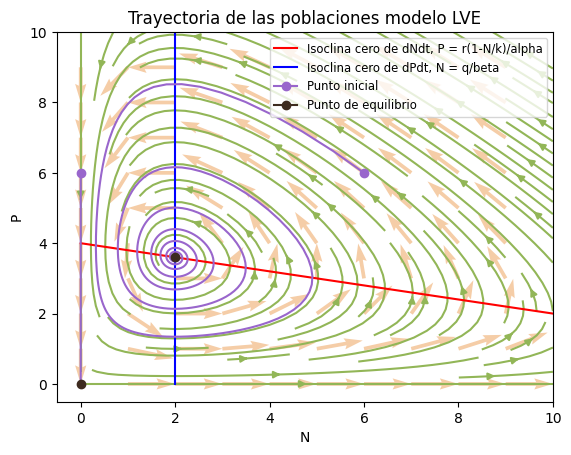

In [42]:
#PRESA-PREDADOR LVE

import numpy as np
import matplotlib.pyplot as plt

q=0.8
alpha=0.5
beta=0.4
r=2
k=20

# definir meshgrid para grilla
x = np.linspace(0, 10, 100)
y = np.linspace(0, 10, 100)
X, Y = np.meshgrid(x, y)

def ode_N_Volterra_LVE(N, P,alpha, r,k):
    u = r*N*(1-N/k) - alpha*N*P
    return u
def ode_P_Volterra_LVE(N, P, beta, q):
    v = beta*N*P - q*P
    return v

# Define velocity components
def velocity_function(N, P,alpha, beta, r, q,k):
    u = r*N*(1-N/k) - alpha*N*P
    v = beta*N*P - q*P
    return u, v
#esta es la recta de la isoclina de N
def dPdtequals0(r,N,k,alpha):
    return (-r+r*N/k)/(-alpha)
#calc vectores velocidad
u, v = velocity_function(X, Y, alpha, beta, r, q,k)

#streamplot
plt.streamplot(X, Y, u, v,density=1,color='#92B657')
#graficar isoclinas
plt.plot(np.linspace(0,10,100), dPdtequals0(r,x,k,alpha), 'r', label='Isoclina cero de dNdt, P = r(1-N/k)/alpha')
plt.plot([q/beta, q/beta], [0, 10], 'b', label='Isoclina cero de dPdt, N = q/beta')
#graficar quivers
for i in range(0,10,1):
    for j in range(0,10,1):
        if not (i==2 and j==4) and not(i==0 and j==0):
            plt.quiver([i],[j],(velocity_function(i,j,alpha,beta,r,q,k)[0])/norma(velocity_function(i,j,alpha,beta,r,q,k)),(velocity_function(i,j,alpha,beta,r,q,k)[1])/norma(velocity_function(i,j,alpha,beta,r,q,k)), angles='xy', scale_units='xy', scale=1, color='#F5CDA7')
###
plt.xlabel('N')
plt.ylabel('P')
plt.title('Trayectoria de las poblaciones modelo LVE')

lambda_ode_N=lambda n,p: ode_N_Volterra_LVE(n, p,alpha, r,k)
lambda_ode_P=lambda n,p: ode_P_Volterra_LVE(n, p,beta, q)

N_0 = 6
P_0 = 6
Ns,Ps=runge_kutta4_method_fg(lambda_ode_N,lambda_ode_P, N_0,P_0, tiempo)
plt.plot(Ns,Ps, color='#9966CC')

N_0 = 0
P_0 = 6
Ns,Ps=runge_kutta4_method_fg(lambda_ode_N,lambda_ode_P, N_0,P_0, tiempo)
plt.plot(Ns,Ps, color='#9966CC')

plt.plot(6, 6, marker='o', color='#9966CC',label='Punto inicial')
plt.plot(0, 6, marker='o', color='#9966CC')

plt.plot(q/beta, 3.6, marker='o', color='#3D2B1F',label='Punto de equilibrio')
plt.plot(0, 0, marker='o', color='#3D2B1F')

plt.xlabel('N')
plt.ylabel('P')
plt.legend(fontsize='small', loc='upper right')
plt.show()


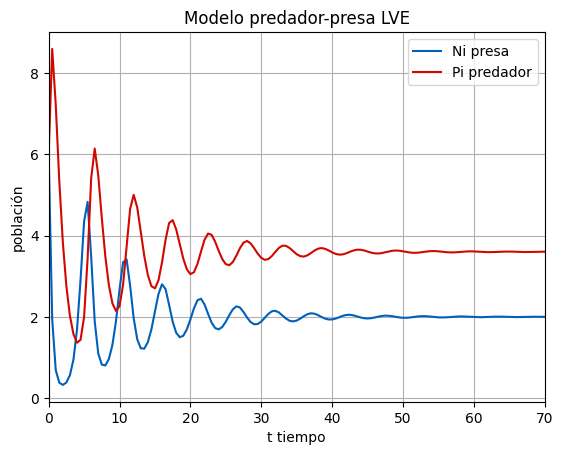

In [43]:
#PRESA-PREDADOR LVE EN EL TIEMPO CON LOS VALORES DE LAS ISOCLINAS. 
import numpy as np
import matplotlib.pyplot as plt

def rungekutta4_fg(f,g,t0,N0,P0,h,muestras):
    tamano = muestras + 1
    tabla = np.zeros(shape=(tamano,3),dtype=float)
    tabla[0] = [t0,N0,P0]
    ti = t0
    Ni = N0
    Pi = P0
    for i in range(1,tamano,1):
        K1x = h * f(ti,Ni,Pi)
        K1y = h * g(ti,Ni,Pi)
        
        K2x = h * f(ti+h/2, Ni + K1x/2, Pi+K1y/2)
        K2y = h * g(ti+h/2, Ni + K1x/2, Pi+K1y/2)

        K3x = h * f(ti+h/2, Ni + K2x/2, Pi+K2y/2)
        K3y = h * g(ti+h/2, Ni + K2x/2, Pi+K2y/2)

        K4x = h * f(ti+h, Ni + K3x, Pi+K3y)
        K4y = h * g(ti+h, Ni + K3x, Pi+K3y)

        Ni = Ni + (1/6)*(K1x+2*K2x+2*K3x+K4x)
        Pi = Pi + (1/6)*(K1y+2*K2y+2*K3y+K4y)
        ti = ti + h
        
        tabla[i] = [ti,Ni,Pi]
    tabla = np.array(tabla)
    return(tabla)


q=0.8
r=2
k=20
alpha=0.5
beta=0.4

presa = lambda t,N,P : r*N*(1-N/k) - alpha*N*P
predador = lambda t,N,P : beta*N*P - q*P

t0 = 0
N0 = 6
P0 = 6

h = 0.5
muestras = 501

colores = [('#D20700', '#FF7E79'),('#43A700', '#96FF50'),('#0060BA', '#6DB8FF')]

tabla = rungekutta4_fg(presa,predador,t0,P0,N0,h,muestras)
tiRK4 = tabla[:,0]
NiRK4 = tabla[:,1]
PiRK4 = tabla[:,2]
np.set_printoptions(precision=6)
plt.plot(tiRK4,NiRK4, label='Ni presa', color = colores[2][0])
plt.plot(tiRK4,PiRK4, label='Pi predador', color = colores[0][0])

plt.xlim(0,70)
plt.title('Modelo predador-presa LVE')
plt.xlabel('t tiempo')
plt.ylabel('población')
plt.legend()
plt.grid()
plt.show()

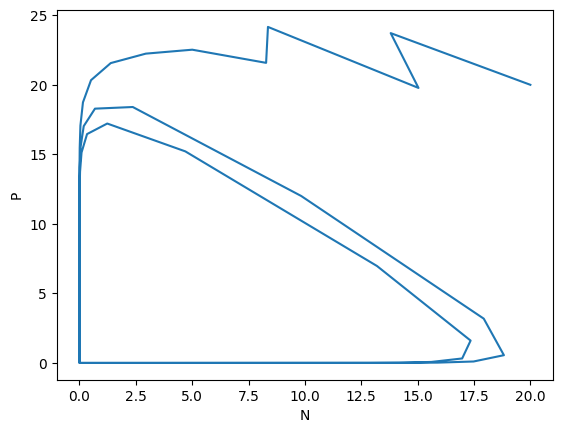

In [44]:
#GRAFICAR UNA TRAYECTORIA EN MODELO PRESA-PREDADOR COMUN
N_0=20
P_0=20
alpha=0.5
beta=0.5
r=0.5
q=0.5
k=100
tiempo=np.linspace(0,100,500)

def runge_kutta4_method_fg(f,g, n0, p0, tiempo):
    y_values = [n0]
    p_values=[p0]
    y = n0
    p=p0
    h = tiempo[1] - tiempo[0]

    for t in tiempo[1:]:
        k1N = h * f(y,p)
        k1P = h * g(y,p)
        k2N = h * f(y+ 0.5 * k1N,p + 0.5 * k1P)
        k2P = h * g(y+ 0.5 * k1N,p + 0.5 * k1P)
        k3P = h * g(y+ 0.5 * k2N,p + 0.5 * k2P)
        k3N = h * f(y+ 0.5 * k2N,p + 0.5 * k2P)
        k4N = h * f(y+k3N,p + k3P)
        k4P = h * g(y+k3N,p + k3P)
        y += (k1N + 2*k2N + 2*k3N + k4N) / 6
        p += (k1P + 2*k2P + 2*k3P + k4P) / 6
        y_values.append(y)
        p_values.append(p)

    return y_values,p_values


def ode_N_Volterra_Comun(N, P,alpha, r):
    u = r*N - alpha*N*P
    return u
def ode_P_Volterra_Comun(N, P, beta, q):
    v = beta*N*P - q*P
    return v

lambda_ode_N=lambda n,p: ode_N_Volterra_Comun(n, p,alpha, r)
lambda_ode_P=lambda n,p: ode_P_Volterra_Comun(n, p,beta, q)

# Ns,Ps=runge_kutta4_method(lambda_ode_N,lambda_ode_P, N_0,P_0, np.linspace(0,400,1000))
Ns,Ps=runge_kutta4_method(lambda_ode_N,lambda_ode_P,N_0,P_0,tiempo)

plt.plot(Ns,Ps)
plt.xlabel('N')
plt.ylabel('P')
# plt.xlim(-1,5)
# plt.ylim(-1,5)
plt.show()

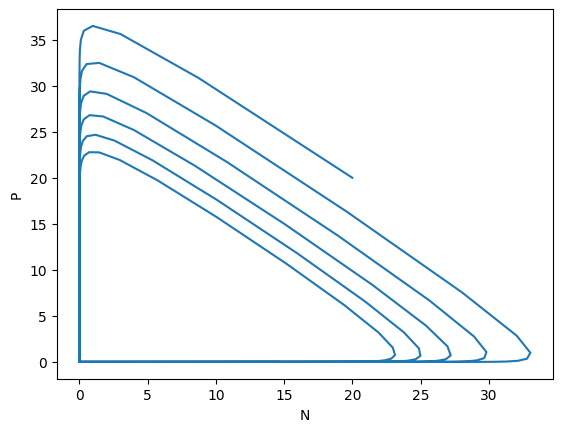

In [45]:
#GRAFICAR UNA TRAYECTORIA EN MODELO PRESA-PREDADOR LVE
N_0=20
P_0=20
alpha=0.5
beta=0.5
r=0.5
q=0.5
k=200
tiempo=np.linspace(0,400,6000)


Ns=[]
Ps=[]

def ode_N_Volterra_LVE(N, P,alpha, r,k):
    u = r*N*(1-N/k) - alpha*N*P
    return u
def ode_P_Volterra_LVE(N, P, beta, q):
    v = beta*N*P - q*P
    return v

lambda_ode_N=lambda n,p: ode_N_Volterra_LVE(n, p,alpha, r,k)
lambda_ode_P=lambda n,p: ode_P_Volterra_LVE(n, p,beta, q)

Ns,Ps=runge_kutta4_method_fg(lambda_ode_N,lambda_ode_P, N_0,P_0, tiempo)

plt.plot(Ns,Ps)
plt.xlabel('N')
plt.ylabel('P')
plt.show()

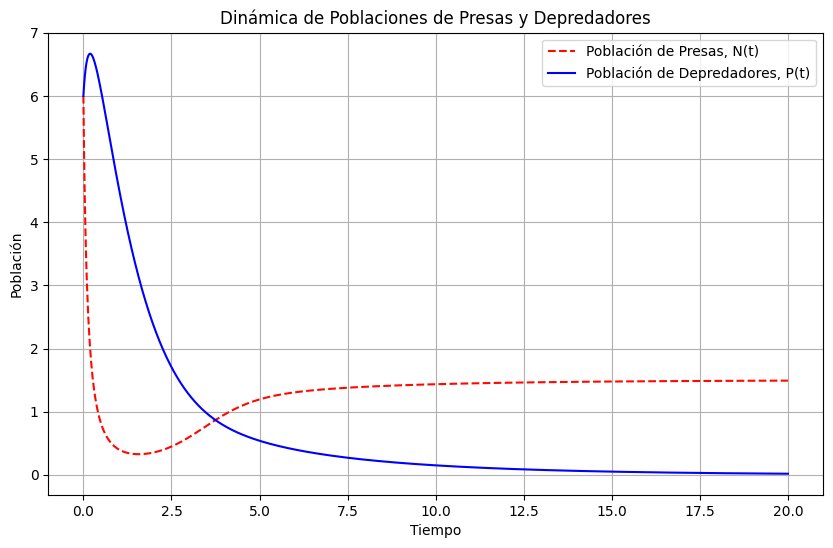

In [46]:
# #PRESA-PREDADOR LOTKA VOLTERRA LVE EN EL TIEMPO CON LOS VALORES DE LAS ISOCLINAS. K<1/BETA
# import numpy as np
# import matplotlib.pyplot as plt

# #PRESA-PREDADOR LVE EN EL TIEMPO CON LOS VALORES DE LAS ISOCLINAS. 
# import numpy as np
# import matplotlib.pyplot as plt

# def rungekutta4_fg(f,g,t0,N0,P0,h,muestras):
#     tamano = muestras + 1
#     tabla = np.zeros(shape=(tamano,3),dtype=float)
#     tabla[0] = [t0,N0,P0]
#     ti = t0
#     Ni = N0
#     Pi = P0
#     for i in range(1,tamano,1):
#         K1x = h * f(ti,Ni,Pi)
#         K1y = h * g(ti,Ni,Pi)
        
#         K2x = h * f(ti+h/2, Ni + K1x/2, Pi+K1y/2)
#         K2y = h * g(ti+h/2, Ni + K1x/2, Pi+K1y/2)

#         K3x = h * f(ti+h/2, Ni + K2x/2, Pi+K2y/2)
#         K3y = h * g(ti+h/2, Ni + K2x/2, Pi+K2y/2)

#         K4x = h * f(ti+h, Ni + K3x, Pi+K3y)
#         K4y = h * g(ti+h, Ni + K3x, Pi+K3y)

#         Ni = Ni + (1/6)*(K1x+2*K2x+2*K3x+K4x)
#         Pi = Pi + (1/6)*(K1y+2*K2y+2*K3y+K4y)
#         ti = ti + h
        
#         tabla[i] = [ti,Ni,Pi]
#     tabla = np.array(tabla)
#     return(tabla)

# r=2
# k=1.5
# q=0.8
# alpha=0.5
# beta=0.4

# presa = lambda t,N,P : r*N*(1-N/k) - alpha*N*P
# predador = lambda t,N,P : beta*N*P - q*P

# t0 = 0
# N0 = 6
# P0 = 6

# h = 0.5
# muestras = 501

# tabla = rungekutta4_fg(presa,predador,t0,N0,P0,h,muestras)
# tiRK4 = tabla[:,0]
# NiRK4 = tabla[:,1]
# PiRK4 = tabla[:,2]
# np.set_printoptions(precision=6)
# plt.plot(tiRK4,NiRK4, label='Ni presa', color = '#0060BA')
# plt.plot(tiRK4,PiRK4, label='Pi predador', color = '#D20700')

# plt.ylim(0,7)
# plt.xlim(0,0.25)
# plt.title('Modelo predador-presa LVE')
# plt.xlabel('t tiempo')
# plt.ylabel('población')
# plt.legend()
# plt.grid()
# plt.show()

q = 0.8
alpha = 0.5
beta = 0.4
r = 2
k = 1.5

lambda_ode_N = lambda n, p: ode_N_Volterra_LVE(n, p, alpha, r, k)
lambda_ode_P = lambda n, p: ode_P_Volterra_LVE(n, p, beta, q)

# Definir el tiempo para la simulación
tiempo = np.linspace(0, 20, 1000)

# Resolver las ecuaciones diferenciales con Runge-Kutta
N0 = 6
P0 = 6
Ns, Ps = runge_kutta4_method_fg(lambda_ode_N, lambda_ode_P, N0, P0, tiempo)

# Graficar N(t) y P(t) en la misma gráfica
plt.figure(figsize=(10, 6))
plt.plot(tiempo, Ns, label='Población de Presas, N(t)', color='#FF0800', linestyle='--')
plt.plot(tiempo, Ps, label='Población de Depredadores, P(t)', color='#0000FF')
plt.xlabel('Tiempo')
plt.ylabel('Población')
plt.title('Dinámica de Poblaciones de Presas y Depredadores')
plt.legend()
plt.grid(True)
plt.show()